1. Load the Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert
from scipy.stats import pearsonr

# load data
data = pd.read_csv("D1_sensor_data.csv")
data.head()

# Filter the data for tag_number 202204
filtered_data = data[data['tag_number'] == 202204].reset_index(drop=True)
filtered_data.head()

,published_at,temperature,humidity,tag_number,beehub_name,geolocation,hive_power,lat,long,date,...,hz_396.728515625,hz_427.24609375,hz_457.763671875,hz_488.28125,hz_518.798828125,hz_549.31640625,hz_579.833984375,audio_density,audio_density_ratio,density_variation
0,2020-05-26 10:54:03+00:00,28.98,44.97,202204,nectar-bh121,POINT (-71.474 46.742),-8.593,46.742,-71.474,2020-05-26,...,7.36,8.29,6.36,5.49,2.84,3.93,5.07,8.05,0.639,8.96
1,2020-05-26 11:09:03+00:00,33.56,55.20,202204,nectar-bh121,POINT (-71.474 46.742),4.590,46.742,-71.474,2020-05-26,...,11.50,16.69,14.08,9.21,13.32,10.41,7.83,11.02,0.824,5.38
2,2020-05-26 14:05:52+00:00,35.28,55.48,202204,nectar-bh121,POINT (-71.47499999999999 46.742),1.708,46.742,-71.475,2020-05-26,...,16.03,19.49,14.91,9.92,6.92,9.30,15.11,19.96,0.792,13.00
3,2020-05-26 14:20:52+00:00,36.20,53.58,202204,nectar-bh121,POINT (-71.47499999999999 46.742),4.768,46.742,-71.475,2020-05-26,...,14.36,13.97,13.43,11.43,10.33,10.03,10.40,18.96,0.859,9.75
4,2020-05-26 14:35:52+00:00,36.42,50.59,202204,nectar-bh121,POINT (-71.47499999999999 46.742),1.637,46.742,-71.475,2020-05-26,...,15.12,22.40,17.72,14.14,12.89,12.78,11.98,15.99,0.671,6.97


AP dimension

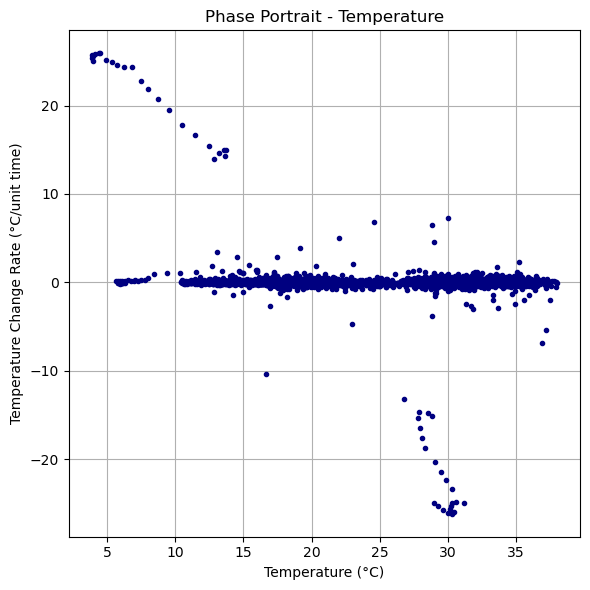

In [41]:
# 从数据框获取温度数据（保持原始结构）
temperature_data = df['temperature'].values

# 位移序列（去掉最后一个点）
x_t = temperature_data[:-1]

# 简单前向差分得到速度
vel_xt = np.diff(temperature_data)

# 绘制基础相图（保持原始可视化格式）
plt.figure(figsize=(6, 6))
plt.plot(x_t, vel_xt, 'o', markersize=3, color='navy')
plt.title("Phase Portrait - Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Temperature Change Rate (°C/unit time)")
plt.grid(True)
plt.tight_layout()
plt.show()

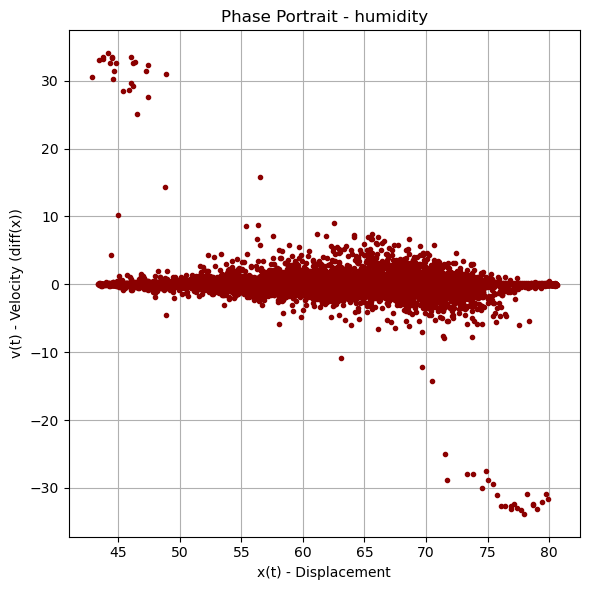

In [44]:
# 用某个频率通道模拟“左髋关节 AP 方向位移”
humidity_data = df['humidity'].values

# 位移序列（去掉最后一个点）
x_t = humidity_data[:-1]

# 差分得到速度（近似一阶导）
vel_xt = np.diff(humidity_data)

# 绘制相图
plt.figure(figsize=(6, 6))
plt.plot(x_t, vel_xt, 'o', markersize=3, color='darkred')
plt.title("Phase Portrait - humidity")
plt.xlabel("x(t) - Displacement")
plt.ylabel("v(t) - Velocity (diff(x))")
plt.grid(True)
plt.tight_layout()
plt.show()

continuous relative phase

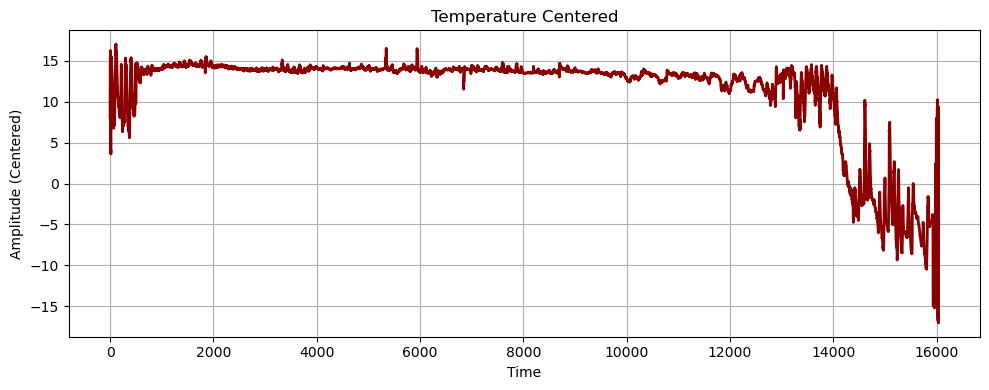

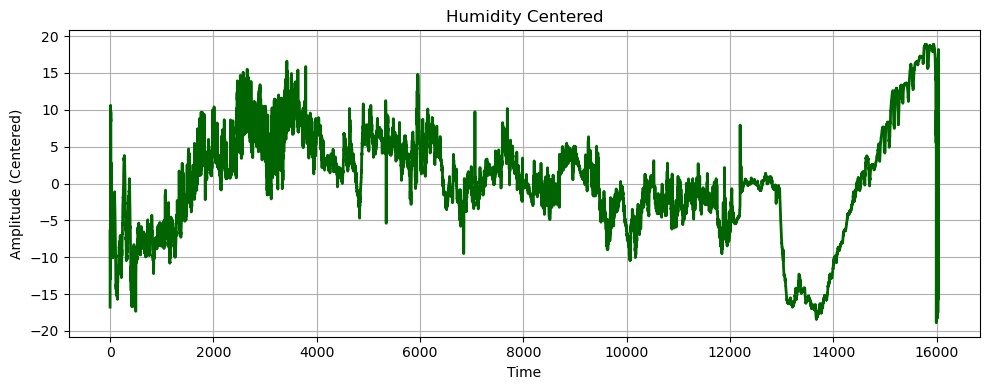

In [43]:
# 使用温度湿度数据
temperature = df['temperature'].values
humidity = df['humidity'].values

# 用索引模拟时间（或者使用真实时间列）
if 'Time(s)' in df.columns:
    time = df['Time(s)'].values
else:
    time = np.arange(len(df))

# 中心化处理（保持原方法不变）
def center_signal(x):
    return x - np.min(x) - (np.max(x) - np.min(x)) / 2

temperature_centered = center_signal(temperature)
humidity_centered = center_signal(humidity)

# 可视化：温度中心化信号
plt.figure(figsize=(10, 4))
plt.plot(time, temperature_centered, color='darkred', linewidth=2)
plt.title("Temperature Centered")
plt.xlabel("Time")
plt.ylabel("Amplitude (Centered)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 可视化：湿度中心化信号
plt.figure(figsize=(10, 4))
plt.plot(time, humidity_centered, color='darkgreen', linewidth=2)
plt.title("Humidity Centered")
plt.xlabel("Time")
plt.ylabel("Amplitude (Centered)")
plt.grid(True)
plt.tight_layout()
plt.show()

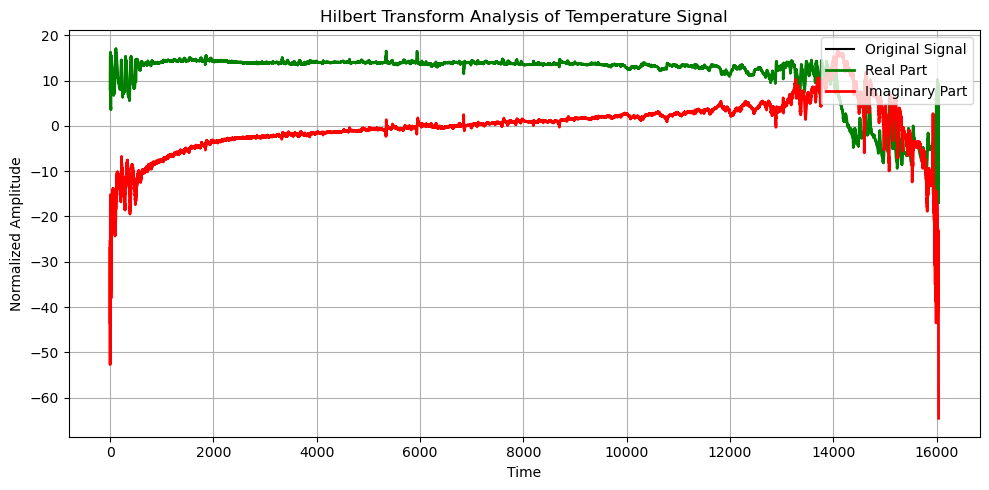

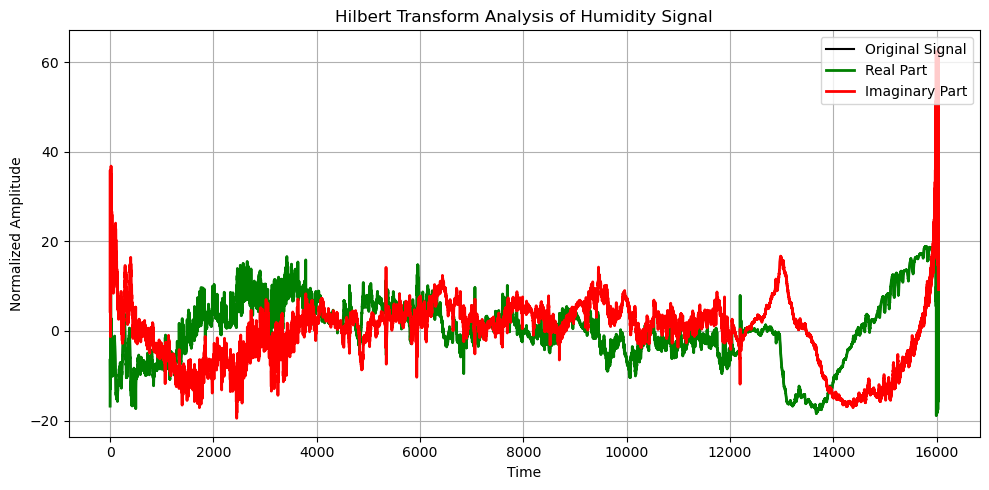

In [48]:
# Time vector
if 'Time(s)' in df.columns:
    time = df['Time(s)'].values
else:
    time = np.arange(len(df))

# Select temperature and humidity channels
temperature = df['temperature'].values
humidity = df['humidity'].values

# Centralization processing
def center_signal(x):
    return x - np.min(x) - (np.max(x) - np.min(x)) / 2

temperature_centered = center_signal(temperature)
humidity_centered = center_signal(humidity)

# Perform Hilbert transform
ht_temperature = hilbert(temperature_centered)
ht_humidity = hilbert(humidity_centered)

# Visualize Hilbert Transform results for temperature
plt.figure(figsize=(10, 5))
plt.plot(time, temperature_centered, 'k', label='Original Signal', linewidth=1.5)
plt.plot(time, np.real(ht_temperature), 'g', label='Real Part', linewidth=2)
plt.plot(time, np.imag(ht_temperature), 'r', label='Imaginary Part', linewidth=2)

plt.title("Hilbert Transform Analysis of Temperature Signal")
plt.xlabel("Time")
plt.ylabel("Normalized Amplitude")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize Hilbert Transform results for humidity (additional plot)
plt.figure(figsize=(10, 5))
plt.plot(time, humidity_centered, 'k', label='Original Signal', linewidth=1.5)
plt.plot(time, np.real(ht_humidity), 'g', label='Real Part', linewidth=2)
plt.plot(time, np.imag(ht_humidity), 'r', label='Imaginary Part', linewidth=2)

plt.title("Hilbert Transform Analysis of Humidity Signal")
plt.xlabel("Time")
plt.ylabel("Normalized Amplitude")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

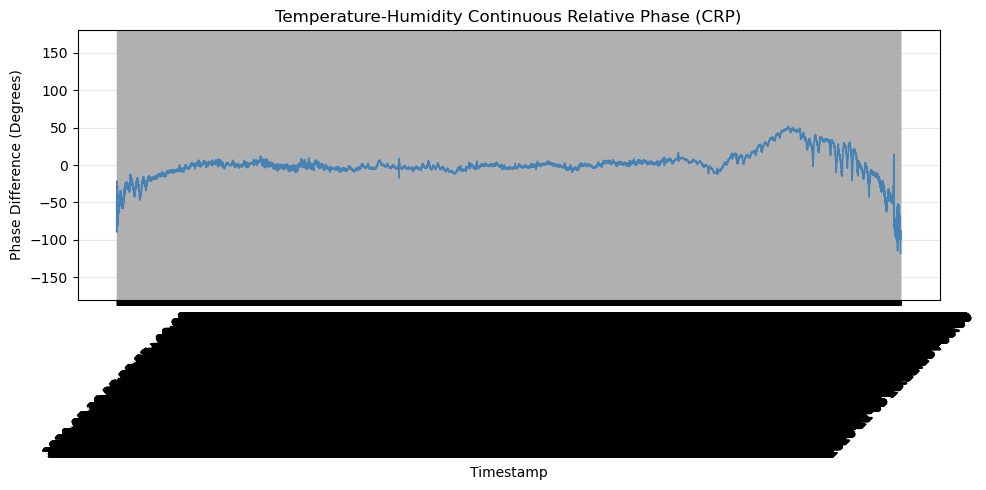

In [46]:
# 选择温度湿度作为分析对象
freq1 = 'temperature'
freq2 = 'humidity'
signal1 = filtered_data[freq1].values
signal2 = filtered_data[freq2].values

# Hilbert变换 -> 瞬时相位
phase1 = np.unwrap(np.angle(hilbert(signal1)))
phase2 = np.unwrap(np.angle(hilbert(signal2)))

# 计算连续相对相位（CRP）
crp = np.rad2deg(phase1 - phase2) % 360
crp[crp > 180] -= 360  # 映射到[-180, 180]范围

# 可视化
plt.figure(figsize=(10, 5))
plt.plot(filtered_data['published_at'], crp, color='steelblue', linewidth=1.2)
plt.title('Temperature-Humidity Continuous Relative Phase (CRP)')
plt.xlabel('Timestamp')
plt.ylabel('Phase Difference (Degrees)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.ylim(-180, 180)  # 明确显示相位范围
plt.tight_layout()
plt.show()

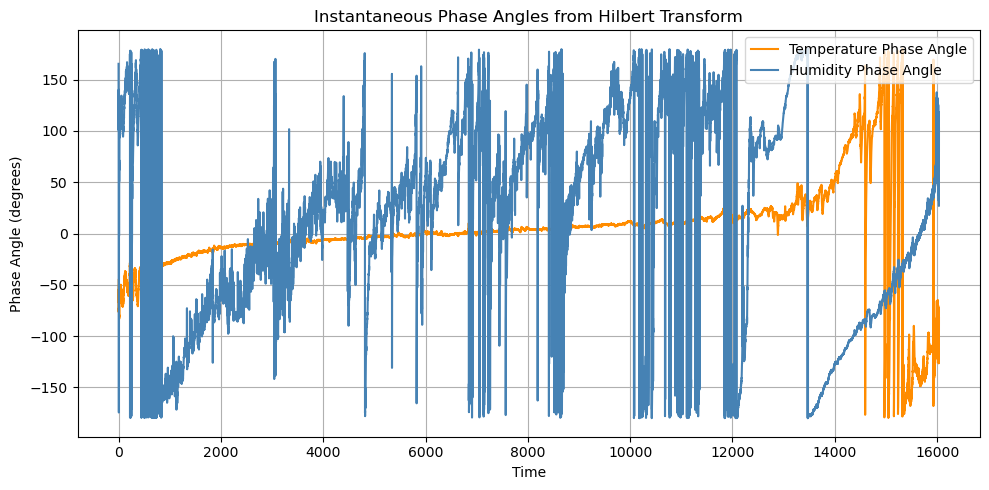

In [52]:
# Time vector
if 'Time(s)' in df.columns:
    time = df['Time(s)'].values
else:
    time = np.arange(len(df))

# Extract and center signals
temperature = df['temperature'].values
humidity = df['humidity'].values

def center_signal(x):
    return x - np.min(x) - (np.max(x) - np.min(x)) / 2

temperature_centered = center_signal(temperature)
humidity_centered = center_signal(humidity)

# Hilbert transform
ht_temp = hilbert(temperature_centered)
ht_humid = hilbert(humidity_centered)

# Calculate phase angles (in degrees)
phase_angle_temp = np.rad2deg(np.angle(ht_temp))
phase_angle_humid = np.rad2deg(np.angle(ht_humid))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, phase_angle_temp, label='Temperature Phase Angle', color='darkorange')
plt.plot(time, phase_angle_humid, label='Humidity Phase Angle', color='steelblue')
plt.title("Instantaneous Phase Angles from Hilbert Transform")
plt.xlabel("Time")
plt.ylabel("Phase Angle (degrees)")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

from scipy.signal import detrend
temperature_centered = detrend(temperature_centered)
humidity_centered = detrend(humidity_centered)